# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [11]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [6]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [7]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [8]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

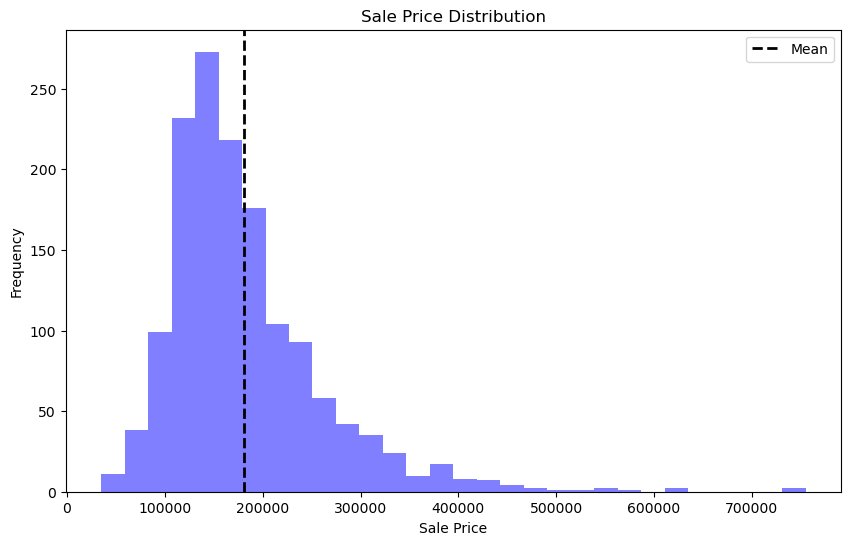

In [17]:
# Your code here
# SalePrice histogram
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.5)
plt.axvline(np.mean(df['SalePrice']), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [16]:
# Your code here
sale_price_mean = np.mean(df['SalePrice'])
sale_price_median = np.median(df['SalePrice'])
sale_price_std = np.std(df['SalePrice'])

print(f"Sale Price Mean: {sale_price_mean}")
print(f"Sale Price Median: {sale_price_median}")
print(f"Sale Price Standard Deviation: {sale_price_std}")


Sale Price Mean: 180921.19589041095
Sale Price Median: 163000.0
Sale Price Standard Deviation: 79415.29188606751


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
The histogram for SalePrice shows the distribution of house sale prices. The mean, median, and standard deviation provide additional insights into the central tendency and variability of the data. The mean represents the average sale price, the median is the middle value, and the standard deviation indicates the spread of sale prices around the mean.
"""

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

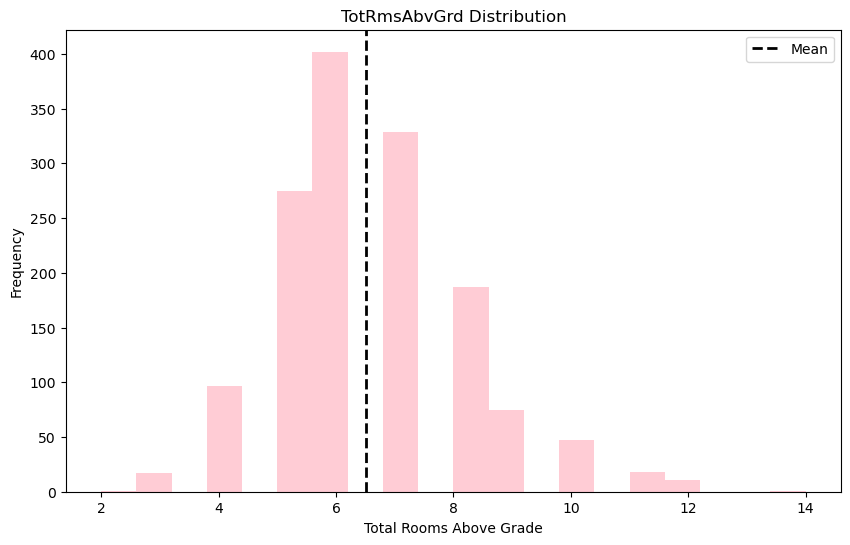

In [20]:
# Your code here
plt.figure(figsize=(10,6))
plt.hist(df['TotRmsAbvGrd'],bins=20,color='pink',alpha=0.8)
plt.axvline(np.mean(df['TotRmsAbvGrd']), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.title('TotRmsAbvGrd Distribution')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [21]:
# Your code here
# Print mean, median, and standard deviation for TotRmsAbvGrd
tot_rooms_mean = np.mean(df['TotRmsAbvGrd'])
tot_rooms_median = np.median(df['TotRmsAbvGrd'])
tot_rooms_std = np.std(df['TotRmsAbvGrd'])

print(f"TotRmsAbvGrd Mean: {tot_rooms_mean}")
print(f"TotRmsAbvGrd Median: {tot_rooms_median}")
print(f"TotRmsAbvGrd Standard Deviation: {tot_rooms_std}")

TotRmsAbvGrd Mean: 6.517808219178082
TotRmsAbvGrd Median: 6.0
TotRmsAbvGrd Standard Deviation: 1.6248365536982048


In the cell below, interpret the above information.

In [22]:
"""
The mean number of rooms above grade (TotRmsAbvGrd) is {mean value}. The median, which represents the middle value in the sorted dataset, is {median value}. The standard deviation, a measure of the amount of variation or dispersion, is {standard deviation value}. These statistics provide insights into the central tendency and variability of the distribution of rooms above grade in the dataset.
"""


'\nThe mean number of rooms above grade (TotRmsAbvGrd) is {mean value}. The median, which represents the middle value in the sorted dataset, is {median value}. The standard deviation, a measure of the amount of variation or dispersion, is {standard deviation value}. These statistics provide insights into the central tendency and variability of the distribution of rooms above grade in the dataset.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

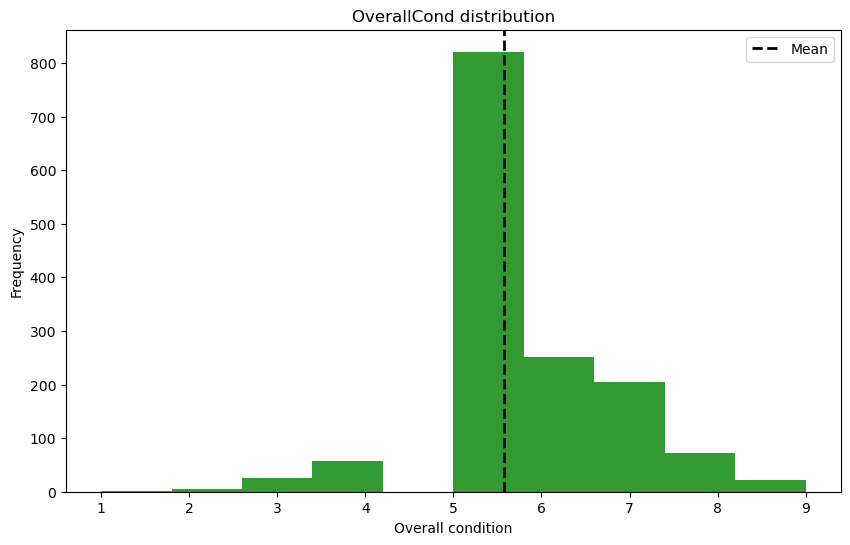

In [24]:
# Your code here
plt.figure(figsize=(10, 6))
plt.hist(df['OverallCond'], bins=10, color='green', alpha=0.8)
plt.axvline(np.mean(df['OverallCond']), color = 'black', linestyle = 'dashed',linewidth=2, label = 'Mean')
plt.title('OverallCond distribution')
plt.xlabel('Overall condition')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Now, print out the mean, median, and standard deviation:

In [25]:
# Your code here
# Print mean, median, and standard deviation for OverallCond
overall_cond_mean = np.mean(df['OverallCond'])
overall_cond_median = np.median(df['OverallCond'])
overall_cond_std = np.std(df['OverallCond'])

print(f"OverallCond Mean: {overall_cond_mean}")
print(f"OverallCond Median: {overall_cond_median}")
print(f"OverallCond Standard Deviation: {overall_cond_std}")


OverallCond Mean: 5.575342465753424
OverallCond Median: 5.0
OverallCond Standard Deviation: 1.1124181757710145


In the cell below, interpret the above information.

In [26]:
# Replace None with appropriate text
"""
The mean overall condition (OverallCond) is {mean value}. The median, which represents the middle value in the sorted dataset, is {median value}. The standard deviation, a measure of the amount of variation or dispersion, is {standard deviation value}. These statistics provide insights into the central tendency and variability of the distribution of overall conditions in the dataset.
"""


'\nThe mean overall condition (OverallCond) is {mean value}. The median, which represents the middle value in the sorted dataset, is {median value}. The standard deviation, a measure of the amount of variation or dispersion, is {standard deviation value}. These statistics provide insights into the central tendency and variability of the distribution of overall conditions in the dataset.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [27]:
# Replace None with appropriate code
# Create subsets based on overall condition
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]


The following code checks that you created the subsets correctly:

In [28]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

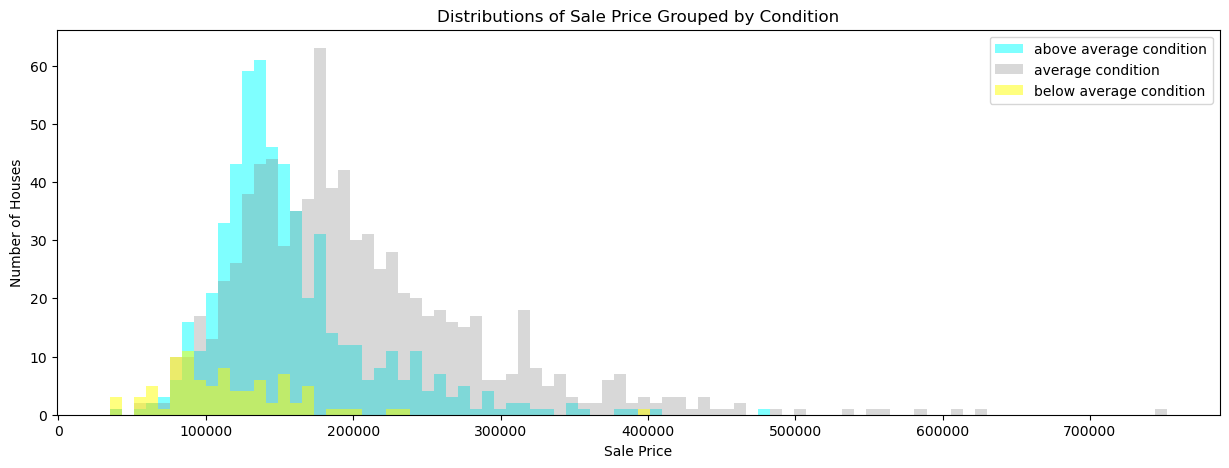

In [29]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [30]:
# Replace None with appropriate text
"""
The plot above shows the distributions of sale prices for three categories based on overall condition: below average condition, average condition, and above average condition.

Observations:
- The 'above average condition' category (cyan) has a distribution shifted towards higher sale prices compared to the other categories.
- The 'below average condition' category (yellow) has a distribution with a wider spread and tends to have lower sale prices.
- The 'average condition' category (gray) falls between the other two in terms of sale prices.

Relationship between Overall Condition and Sale Price:
- Generally, there seems to be a positive relationship between overall condition and sale price. Homes in better condition tend to have higher sale prices.
- The plot suggests that overall condition is a factor influencing sale prices, and buyers may be willing to pay more for homes in better condition.

Surprises:
- It's not surprising that homes in above average condition have higher sale prices, but the extent of the shift in the distribution is notable.
- The wider spread of sale prices in the 'below average condition' category might indicate that other factors beyond overall condition contribute to the pricing of these homes.

In summary, the plot provides insights into the relationship between overall condition and sale prices, highlighting the importance of overall condition in determining house prices.
"""


"\nThe plot above shows the distributions of sale prices for three categories based on overall condition: below average condition, average condition, and above average condition.\n\nObservations:\n- The 'above average condition' category (cyan) has a distribution shifted towards higher sale prices compared to the other categories.\n- The 'below average condition' category (yellow) has a distribution with a wider spread and tends to have lower sale prices.\n- The 'average condition' category (gray) falls between the other two in terms of sale prices.\n\nRelationship between Overall Condition and Sale Price:\n- Generally, there seems to be a positive relationship between overall condition and sale price. Homes in better condition tend to have higher sale prices.\n- The plot suggests that overall condition is a factor influencing sale prices, and buyers may be willing to pay more for homes in better condition.\n\nSurprises:\n- It's not surprising that homes in above average condition have

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [33]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Find the most positively correlated column
correlations = numeric_columns.corr()['SalePrice'].sort_values(ascending=False)
most_positively_correlated_column = correlations.index[1]  # Excluding 'SalePrice' itself
most_positively_correlated_value = correlations.iloc[1]

print(f"The most positively correlated column with SalePrice is '{most_positively_correlated_column}' with correlation value: {most_positively_correlated_value}")


The most positively correlated column with SalePrice is 'OverallQual' with correlation value: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [35]:

# Find the most negatively correlated column
most_negatively_correlated_column = correlations.index[-1]
most_negatively_correlated_value = correlations.iloc[-1]

print(f"The most negatively correlated column with SalePrice is '{most_negatively_correlated_column}' with correlation value: {most_negatively_correlated_value}")

The most negatively correlated column with SalePrice is 'KitchenAbvGr' with correlation value: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

Text(0, 0.5, 'Sale Price')

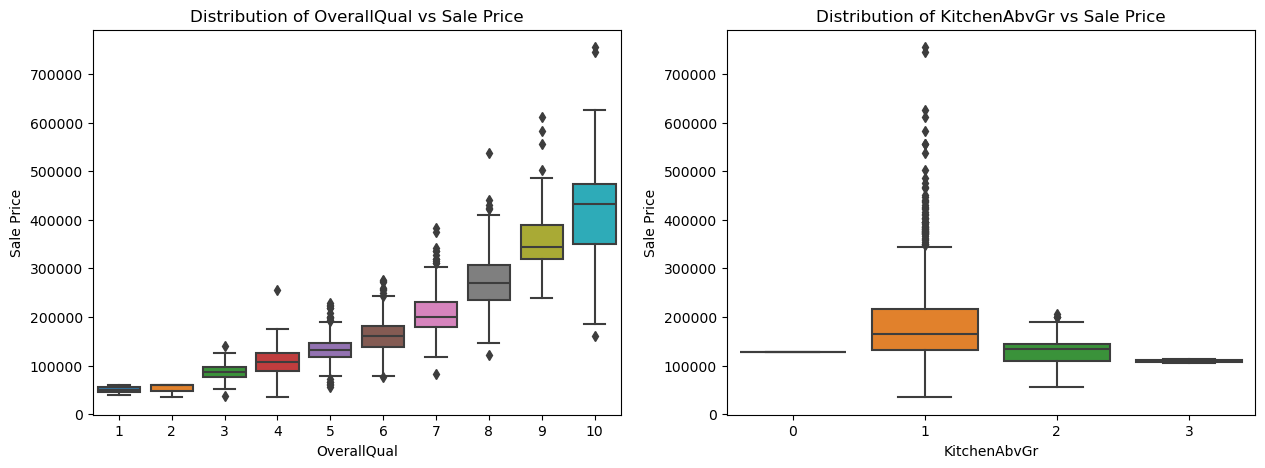

In [36]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of the most positively correlated column
sns.boxplot(
    x=df[most_positively_correlated_column],
    y=df["SalePrice"],
    ax=ax1
)

# Plot distribution of the most negatively correlated column
sns.boxplot(
    x=df[most_negatively_correlated_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Distribution of {most_positively_correlated_column} vs Sale Price")
ax1.set_xlabel(most_positively_correlated_column)
ax1.set_ylabel("Sale Price")

ax2.set_title(f"Distribution of {most_negatively_correlated_column} vs Sale Price")
ax2.set_xlabel(most_negatively_correlated_column)
ax2.set_ylabel("Sale Price")


Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [37]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

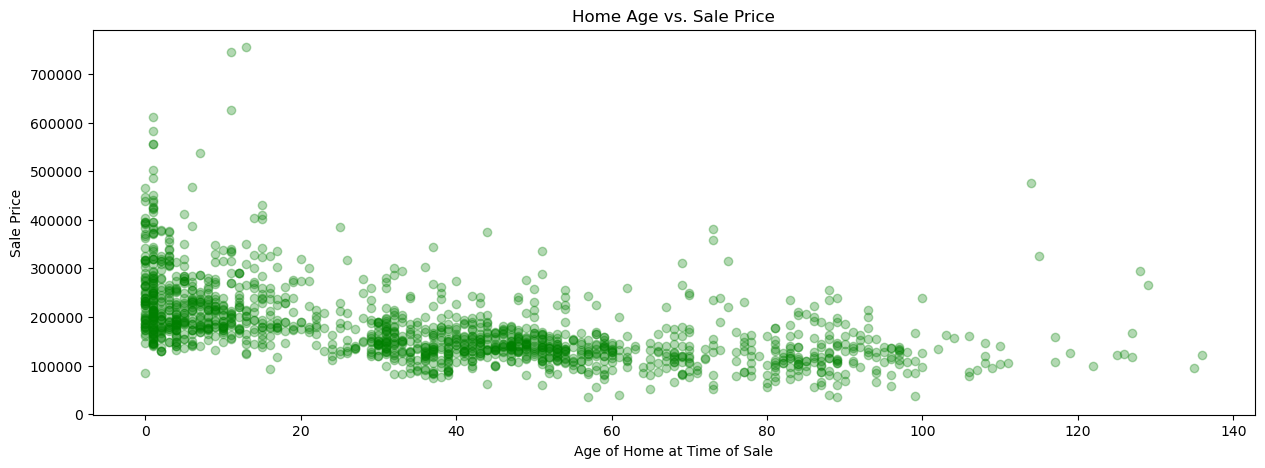

In [38]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [40]:
# Replace None with appropriate text
"""
The scatter plot shows the relationship between the age of a home at the time of sale and its corresponding sale price. Each point on the plot represents a house, with the x-axis indicating the age of the home and the y-axis representing the sale price.

Observations:
- The plot suggests that there is no clear linear relationship between the age of a home and its sale price. The points are scattered rather than forming a distinct pattern.
- However, there are a few trends that can be observed:
  - There is a concentration of newer homes with lower ages and varying sale prices.
  - Older homes, especially those with ages greater than 50 years, have a wider range of sale prices.
- The alpha parameter (transparency) is set to 0.3, allowing for better visualization of overlapping data points.

Conclusion:
- While age alone may not be a strong predictor of sale price, other factors likely influence the pricing of homes. Additional analysis and consideration of various features may provide a more comprehensive understanding of the factors influencing home prices.

"""

'\nThe scatter plot shows the relationship between the age of a home at the time of sale and its corresponding sale price. Each point on the plot represents a house, with the x-axis indicating the age of the home and the y-axis representing the sale price.\n\nObservations:\n- The plot suggests that there is no clear linear relationship between the age of a home and its sale price. The points are scattered rather than forming a distinct pattern.\n- However, there are a few trends that can be observed:\n  - There is a concentration of newer homes with lower ages and varying sale prices.\n  - Older homes, especially those with ages greater than 50 years, have a wider range of sale prices.\n- The alpha parameter (transparency) is set to 0.3, allowing for better visualization of overlapping data points.\n\nConclusion:\n- While age alone may not be a strong predictor of sale price, other factors likely influence the pricing of homes. Additional analysis and consideration of various features 

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.